[[ 3.5]
 [ 1.4]]


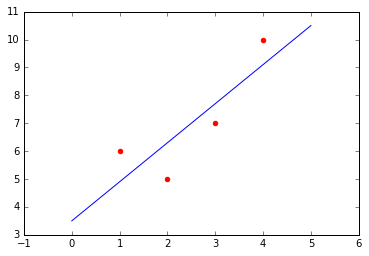

In [2]:
# https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Motivational_example

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

m = 4
input = np.array([
    [1, 6],
    [2, 5],
    [3, 7],
    [4, 10]
])
X = np.matrix([np.ones(m), input[:,0]]).T
y = np.matrix(input[:,1]).T
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(betaHat)

plt.figure(1)
xx = np.linspace(0, 5, 2)
yy = np.array(betaHat[0] + betaHat[1] * xx)
plt.plot(xx, yy.T, color='b')

plt.scatter(input[:,0], input[:,1], color='r')
plt.show()